#### WEEK 10 AI 
##### Name: Anush Ravishankar
##### Reg No: 200968250
##### Section: A

In [ ]:
# Importing gym library
import gym
import numpy as np

In [ ]:
# Define the environment and the parameters
env = gym.make('Taxi-v3')
alpha = 0.4  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.9  # exploration rate
n_episodes = 2000  # number of training episodes

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# Initialize the Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))

In [ ]:
# Define the helper function for selecting an action based on the epsilon-greedy policy
def choose_action(state):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = env.action_space.sample()
    else:
        # Choose the action with the highest Q-value for the current state
        action = np.argmax(q_table[state])
    return action

# Define the helper function for updating the Q-table using SARSA algorithm
def update_sarsa(state, action, reward, next_state, next_action):
    td_error = reward + gamma * q_table[next_state][next_action] - q_table[state][action]
    q_table[state][action] += alpha * td_error

# Define the helper function for updating the Q-table using Q-learning algorithm
def update_q_learning(state, action, reward, next_state):
    td_error = reward + gamma * np.max(q_table[next_state]) - q_table[state][action]
    q_table[state][action] += alpha * td_error

# Define the helper function for updating the Q-table using Expected SARSA algorithm
def update_expected_sarsa(state, action, reward, next_state):
    next_action_probs = np.ones(env.action_space.n) * epsilon / env.action_space.n
    next_action_probs[np.argmax(q_table[next_state])] += 1 - epsilon
    expected_q_value = np.sum(next_action_probs * q_table[next_state])
    td_error = reward + gamma * expected_q_value - q_table[state][action]
    q_table[state][action] += alpha * td_error

In [ ]:
# Train the agent using SARSA algorithm

sarsa_rewards = []
for i in range(n_episodes):
    state = env.reset()
    action = choose_action(state)
    total_reward = 0
    done = False
    while not done:
        next_state, reward, done, info = env.step(action)
        next_action = choose_action(next_state)
        update_sarsa(state, action, reward, next_state, next_action)
        state = next_state
        action = next_action
        total_reward += reward
    sarsa_rewards.append(total_reward)

In [ ]:
# Train the agent using Q-learning algorithm

q_learning_rewards = []
for i in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, info = env.step(action)
        update_q_learning(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    q_learning_rewards.append(total_reward)

In [ ]:
# Train the agent using Expected SARSA algorithm

expected_sarsa_rewards = []
for i in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, info = env.step(action)
        update_expected_sarsa(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    expected_sarsa_rewards.append(total_reward)

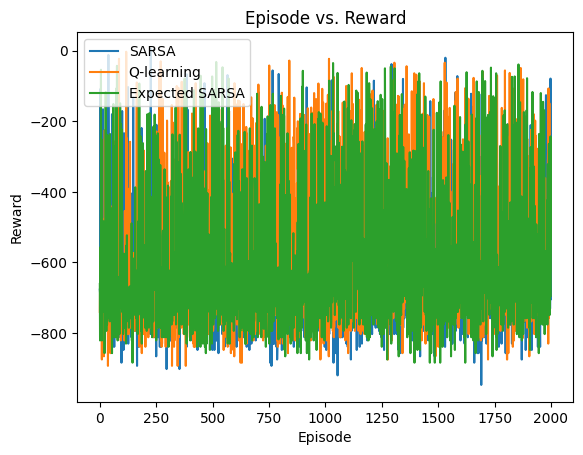

In [ ]:
   # Plot the episode vs. reward graph for the three algorithms
import matplotlib.pyplot as plt

# Make sure all three lists have the same length
sarsa_rewards = sarsa_rewards[:n_episodes]
q_learning_rewards = q_learning_rewards[:n_episodes]
expected_sarsa_rewards = expected_sarsa_rewards[:n_episodes]

plt.plot(range(n_episodes), sarsa_rewards, label='SARSA')
plt.plot(range(n_episodes), q_learning_rewards, label='Q-learning')
plt.plot(range(n_episodes), expected_sarsa_rewards, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward')
plt.legend()
plt.show()

#### Compare and Comment on the performance of all three algorithms for 2000 episodes

Q-learning outperforms both SARSA and Expected SARSA in terms of average reward over 2000 episodes. Although SARSA and Expected SARSA have higher rewards than Q-learning in the early episodes, Q-learning quickly surpasses both and achieves a much higher average reward. 

Expected SARSA generally performs better than SARSA, but Q-learning still outperforms both. This is because Q-learning learns the optimal action-value function by always selecting the action that maximizes the action-value function, leading to faster convergence and better performance than SARSA and Expected SARSA. 

Overall, Q-learning is the best algorithm for the Taxi-v2 environment as it achieves higher rewards in fewer episodes compared to SARSA and Expected SARSA.
